In [30]:
%matplotlib widget
import numpy as np
import jPCA
import matplotlib.pyplot as plt
from jPCA.util import load_churchland_data, plot_projections

In [31]:
# Create timepoints to match the orig data
t = np.arange(-50, 560, 10, dtype=np.int0)
times = list(t)
n = len(times)

In [32]:
# Create datas object as in the the original data

extra_dims = 3
cycle = t * 2.5 * np.pi/ (t[-1]) 
datas = []

for _ in range(108):
    x = t * np.sin(cycle) + np.random.normal(0, 0.01, n)
    y = t * np.cos(cycle) + np.random.normal(0, 0.01, n)
    z = t + np.random.normal(0, 1, n)
    tmp = np.hstack(
        (np.array([x, y, z]).T, 
        np.random.multivariate_normal(
            np.zeros(extra_dims),0.01*np.eye(extra_dims),t.shape[0]
        ))
    )
    
    datas.append(tmp)

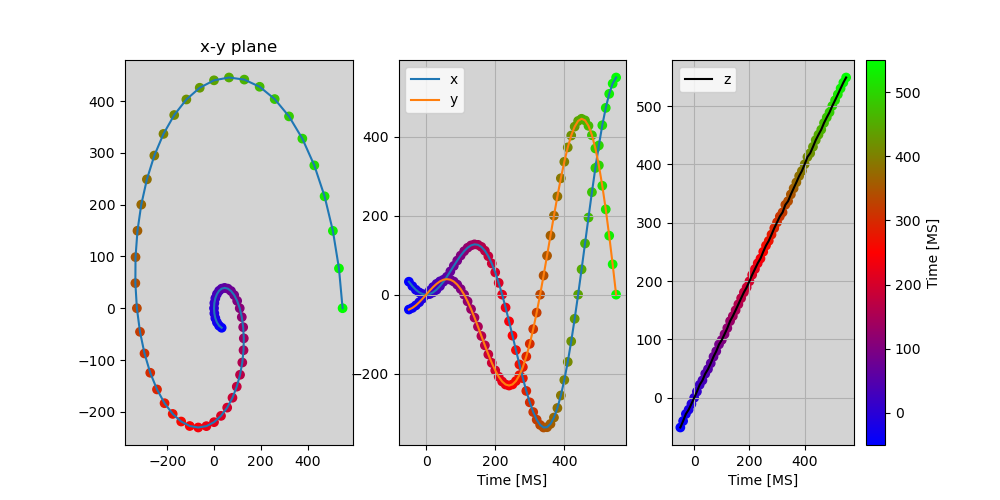

In [33]:
# Plot the data

fig, axes = plt.subplots(1,3 , figsize=(10, 5))
axes[0].plot(datas[0][:, 0], datas[0][:, 1])
axes[0].set_title('x-y plane')
axes[0].set_facecolor('lightgray')
for i in range(2):
    l = 'x' if i == 0 else 'y'
    axes[1].plot(t, datas[0][:, i], label=l)
    axes[1].scatter(t, datas[0][:, i], c=t, cmap='brg')
axes[2].plot(t, datas[0][:, 2], label='z', color='black')
axes[2].scatter(t, datas[0][:, 2], c=t, cmap='brg')

plt.colorbar(
    axes[0].scatter(datas[0][:, 0], datas[0][:, 1], c=t, cmap='brg'), 
    ax=axes[2], label='Time [MS]'
)
for i in range(1,3):
    axes[i].grid()
    axes[i].legend()
    axes[i].set_xlabel('Time [MS]')
    axes[i].set_facecolor('lightgray')


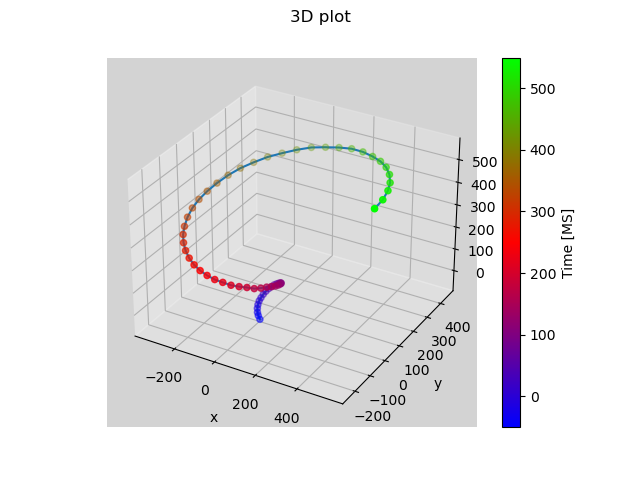

In [34]:
# 3D plot of the significant dimensions
from mpl_toolkits import mplot3d
fig = plt.figure()
fig.suptitle('3D plot')
ax = plt.axes(projection='3d')

ax.plot3D(x, y, z)
fig.colorbar(ax.scatter3D(x, y, z, c=z, cmap='brg'), ax=ax, label='Time [MS]')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# fig.set_facecolor('lightgray')
ax.set_facecolor('lightgray')

In [35]:
# Run jPCA
jpca = jPCA.JPCA(num_jpcs=4)

(projected, 
 full_data_var,
 pca_var_capt,
 jpca_var_capt) = jpca.fit(
    datas, times=times, tstart=-50, tend=150, subtract_cc_mean=False
)

In [36]:
# Dimensions of input and output

print("\nInput:")
print(f'len(datas) = {len(datas)}')
print(f'datas[0].shape = {datas[0].shape}')

print("\nOutput:")
print(f'len(projected) = {len(projected)}')
print(f'projected[0].shape = {projected[0].shape}')

# Variance captured by PCA and jPCA
print("\nExplaind Var:")
print(f'jpca_var_capt = {jpca_var_capt}')
print(f'pca_var_capt = {pca_var_capt}')


Input:
len(datas) = 108
datas[0].shape = (61, 6)

Output:
len(projected) = 108
projected[0].shape = (21, 4)

Explaind Var:
jpca_var_capt = [0.00404493 0.00400964 0.00030531 0.00093433]
pca_var_capt = [0.01230769 0.00255861 0.00031345 0.00030483 0.00029388 0.0002377 ]


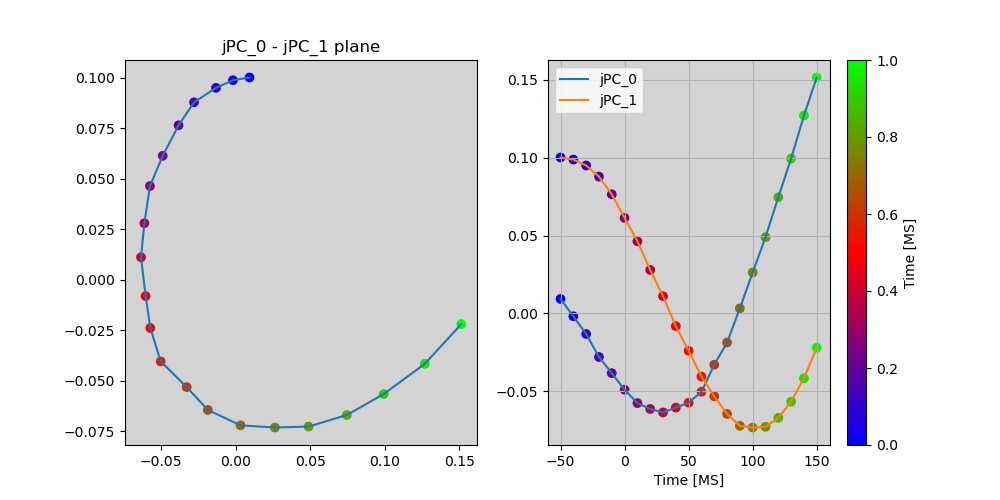

In [37]:
# Plot the projections
fig, axes = plt.subplots(1,2 , figsize=(10, 5))
cr = np.linspace(0, 1, projected[0].shape[0])
axes[0].plot(projected[0][:, 0], projected[0][:, 1])
axes[0].set_title('jPC_0 - jPC_1 plane')
plt.colorbar(
    axes[0].scatter(projected[0][:, 0], projected[0][:, 1], c=cr, cmap='brg'), 
    ax=axes[1], label='Time [MS]'
)
for i in range(2):
    axes[1].plot(
        t[:projected[0][:, i].shape[0]],projected[0][:, i], 
        label=f'jPC_{i}'
    )
    axes[1].scatter(
        t[:projected[0][:, i].shape[0]],projected[0][:, i], 
        c=cr, cmap='brg'
    )
axes[1].grid()
axes[1].legend()
axes[1].set_xlabel('Time [MS]')
axes[1].set_facecolor('lightgray')
axes[0].set_facecolor('lightgray')

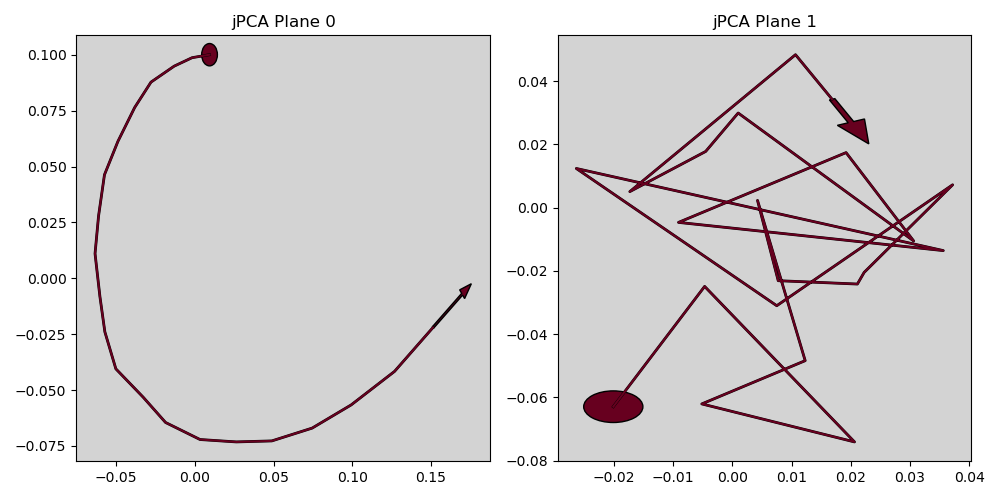

In [38]:
# Plot the projections using the plot_projections function
fig, axes = plt.subplots(1,2, figsize=(10, 5))
plot_projections(projected[:1], axis=axes[0], x_idx=0, y_idx=1, 
                arrow_size=0.005,
                circle_size=0.005)
plot_projections(projected[:1], axis=axes[1], x_idx=2, y_idx=3, 
                arrow_size=0.005,
                circle_size=0.005)

for i in range(2):
    axes[i].set_title(f"jPCA Plane {i}")
    axes[i].set_facecolor('lightgray')
plt.tight_layout()